In [1]:
import pandas as pd
import warnings 
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon, LineString, Point
warnings.filterwarnings(action='ignore')

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist, pdist
from sklearn.preprocessing import StandardScaler

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'

# 1. 결측치 확인

In [3]:
data = pd.read_csv('data/new_data5.csv')
data

,학교명,학급수,학생수,학급당평균학생수,교원수,자치구,전입학생수,전출학생수,주거환경,경제환경,사회환경,교육환경,청소년유동인구,한부모_가구수,한부모_가구원수,저소득,중간,고소득,학업중단율
0,국립국악고등학교,15.0,442.0,29.466667,47.0,강남구,0.0,5.0,6.44,5.38,6.27,5.84,45613.514389,973,2294,20.4,44.9,34.7,0.5
1,개포고등학교,30.0,643.0,21.433333,72.0,강남구,10.0,11.0,6.44,5.38,6.27,5.84,45613.514389,973,2294,20.4,44.9,34.7,1.9
2,경기고등학교,45.0,1214.0,26.977778,101.0,강남구,36.0,27.0,6.44,5.38,6.27,5.84,45613.514389,973,2294,20.4,44.9,34.7,1.8
3,경기여자고등학교,43.0,1141.0,26.534884,98.0,강남구,21.0,18.0,6.44,5.38,6.27,5.84,45613.514389,973,2294,20.4,44.9,34.7,2.3
4,서울로봇고등학교,24.0,460.0,19.166667,76.0,강남구,0.0,5.0,6.44,5.38,6.27,5.84,45613.514389,973,2294,20.4,44.9,34.7,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,동국대학교사범대학부속고등학교,33.0,949.0,28.757576,73.0,동대문구,33.0,20.0,6.10,5.16,5.86,5.55,18514.572581,1157,2709,31.6,46.3,22.0,1.1
316,정화여자상업고등학교,19.0,334.0,17.578947,43.0,동대문구,5.0,7.0,6.10,5.16,5.86,5.55,18514.572581,1157,2709,31.6,46.3,22.0,3.6
317,해성국제컨벤션고등학교,27.0,635.0,23.518519,61.0,동대문구,4.0,18.0,6.10,5.16,5.86,5.55,18514.572581,1157,2709,31.6,46.3,22.0,2.0
318,해성여자고등학교,27.0,673.0,24.925926,58.0,동대문구,16.0,6.0,6.10,5.16,5.86,5.55,18514.572581,1157,2709,31.6,46.3,22.0,1.2


In [4]:
data['학교명'].nunique()

320

In [5]:
data.isnull().sum()

학교명         0
학급수         0
학생수         0
학급당평균학생수    0
교원수         0
자치구         0
전입학생수       0
전출학생수       0
주거환경        0
경제환경        0
사회환경        0
교육환경        0
청소년유동인구     0
한부모_가구수     0
한부모_가구원수    0
저소득         0
중간          0
고소득         0
학업중단율       0
dtype: int64

In [6]:
data.corr()

,학급수,학생수,학급당평균학생수,교원수,전입학생수,전출학생수,주거환경,경제환경,사회환경,교육환경,청소년유동인구,한부모_가구수,한부모_가구원수,저소득,중간,고소득,학업중단율
학급수,1.000000,0.890153,0.299327,0.916006,0.315025,0.301954,0.122296,0.060798,0.196025,0.205587,0.271727,0.101903,0.105569,0.110794,0.038541,-0.116635,-0.284077
학생수,0.890153,1.000000,0.683150,0.763824,0.410114,0.342725,0.100465,0.065093,0.166947,0.166384,0.249010,0.074554,0.078466,0.086070,0.035968,-0.095657,-0.348901
학급당평균학생수,0.299327,0.683150,1.000000,0.177689,0.325095,0.235403,0.029224,0.043445,0.046514,0.036330,0.104894,0.026223,0.028448,0.019777,0.042805,-0.050335,-0.343267
교원수,0.916006,0.763824,0.177689,1.000000,0.226929,0.260037,0.128950,0.046981,0.182830,0.205253,0.268371,0.050207,0.051275,0.107880,-0.042892,-0.047642,-0.255094
전입학생수,0.315025,0.410114,0.325095,0.226929,1.000000,0.386182,-0.002736,-0.013163,0.048015,0.106831,0.086572,-0.059782,-0.057279,-0.055315,-0.032231,0.068253,0.018882
전출학생수,0.301954,0.342725,0.235403,0.260037,0.386182,1.000000,-0.057289,-0.066939,-0.026466,0.061381,0.017573,-0.096856,-0.094652,-0.027830,-0.034364,0.049145,-0.005734
주거환경,0.122296,0.100465,0.029224,0.128950,-0.002736,-0.057289,1.000000,0.544610,0.610195,0.371303,0.323578,0.119865,0.117175,-0.059682,0.094830,-0.031316,0.002619
경제환경,0.060798,0.065093,0.043445,0.046981,-0.013163,-0.066939,0.544610,1.000000,0.263616,0.217567,0.067397,0.035820,0.038311,0.240622,-0.087466,-0.111907,-0.042984
사회환경,0.196025,0.166947,0.046514,0.182830,0.048015,-0.026466,0.610195,0.263616,1.000000,0.598433,0.628808,0.004548,0.014190,0.049228,-0.053832,0.006616,-0.010036
교육환경,0.205587,0.166384,0.036330,0.205253,0.106831,0.061381,0.371303,0.217567,0.598433,1.000000,0.401710,-0.344770,-0.337436,-0.110109,0.003532,0.081985,0.011802


# 2. K-means 모델링

data파일을 복사하기

In [7]:
df = data.copy()

In [8]:
labels= np.array(df['학교명'])

In [9]:
school_info = df[['학교명','자치구']]

In [10]:
school_info['학교명'].nunique()

320

In [11]:
school_info

,학교명,자치구
0,국립국악고등학교,강남구
1,개포고등학교,강남구
2,경기고등학교,강남구
3,경기여자고등학교,강남구
4,서울로봇고등학교,강남구
...,...,...
315,동국대학교사범대학부속고등학교,동대문구
316,정화여자상업고등학교,동대문구
317,해성국제컨벤션고등학교,동대문구
318,해성여자고등학교,동대문구


In [12]:
total=df.loc[:,['학급수','학생수','학급당평균학생수','전출학생수','경제환경','교육환경','저소득','학업중단율']]
total

,학급수,학생수,학급당평균학생수,전출학생수,경제환경,교육환경,저소득,학업중단율
0,15.0,442.0,29.466667,5.0,5.38,5.84,20.4,0.5
1,30.0,643.0,21.433333,11.0,5.38,5.84,20.4,1.9
2,45.0,1214.0,26.977778,27.0,5.38,5.84,20.4,1.8
3,43.0,1141.0,26.534884,18.0,5.38,5.84,20.4,2.3
4,24.0,460.0,19.166667,5.0,5.38,5.84,20.4,0.2
...,...,...,...,...,...,...,...,...
315,33.0,949.0,28.757576,20.0,5.16,5.55,31.6,1.1
316,19.0,334.0,17.578947,7.0,5.16,5.55,31.6,3.6
317,27.0,635.0,23.518519,18.0,5.16,5.55,31.6,2.0
318,27.0,673.0,24.925926,6.0,5.16,5.55,31.6,1.2


## 데이터 표준화

In [13]:
sd = StandardScaler()
total_sd=pd.DataFrame(sd.fit_transform(total))
total_sd.index = labels

In [14]:
total_sd.head()

,0,1,2,3,4,5,6,7
국립국악고등학교,-1.940161,-1.165275,1.106262,-0.986639,0.147603,1.1236,-0.236796,-0.861804
개포고등학교,0.050598,-0.378385,-0.735055,-0.479179,0.147603,1.1236,-0.236796,-0.080091
경기고등학교,2.041358,1.857009,0.535784,0.874046,0.147603,1.1236,-0.236796,-0.135927
경기여자고등학교,1.775923,1.571223,0.434269,0.112857,0.147603,1.1236,-0.236796,0.143256
서울로봇고등학교,-0.745705,-1.094807,-1.254597,-0.986639,0.147603,1.1236,-0.236796,-1.029314


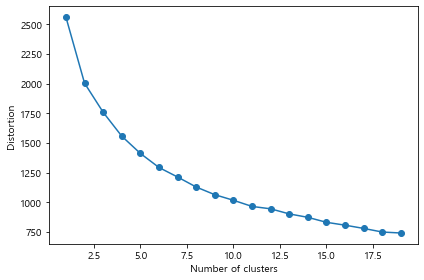

In [15]:
dist =[]
for i in range(1,20):
    k = KMeans(n_clusters=i,
          init='k-means++',
           n_init=10,
           max_iter=300,
           random_state=0)
    k.fit(total_sd)
    dist.append(k.inertia_)

plt.plot(range(1,20),dist, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

k = 3으로 지정

## 군집화

In [16]:
np.random.seed(2021)

In [16]:
total_sd_arr = total_sd.values

#k값을 5로 설정 후 k-means에 적용시키기
kmeans = KMeans(n_clusters =5,random_state=2021).fit(total_sd_arr)
kmeans.cluster_centers_


array([[ 2.15266240e-01, -6.61373839e-02, -3.48623881e-01,
        -2.97496211e-01,  7.06121763e-01,  1.44633112e+00,
        -1.90668227e-01,  7.80033241e-03],
       [-4.13072112e-01, -4.41716753e-01, -1.98027709e-01,
        -2.76837793e-01, -9.66841730e-01, -4.12192162e-01,
        -5.72704613e-01, -3.27468431e-01],
       [-1.21021592e+00, -1.45947788e+00, -1.51776407e+00,
        -1.70474697e-01, -3.61013169e-01, -1.64997798e-01,
        -4.09462138e-01,  3.03280414e+00],
       [-6.21835873e-01, -5.81854105e-01, -2.14852196e-01,
        -3.94602671e-01,  6.06051012e-01, -6.58529673e-01,
         5.90867398e-01, -1.30715993e-01],
       [ 9.98373140e-01,  1.20973541e+00,  8.79772551e-01,
         7.71083428e-01,  1.77815110e-04,  7.77280596e-02,
         2.11021049e-01, -2.76126035e-01]])

In [17]:
total_sd['cluster'] = kmeans.labels_
total_sd

,0,1,2,3,4,5,6,7,cluster
국립국악고등학교,-1.940161,-1.165275,1.106262,-0.986639,0.147603,1.123600,-0.236796,-0.861804,3
개포고등학교,0.050598,-0.378385,-0.735055,-0.479179,0.147603,1.123600,-0.236796,-0.080091,0
경기고등학교,2.041358,1.857009,0.535784,0.874046,0.147603,1.123600,-0.236796,-0.135927,4
경기여자고등학교,1.775923,1.571223,0.434269,0.112857,0.147603,1.123600,-0.236796,0.143256,4
서울로봇고등학교,-0.745705,-1.094807,-1.254597,-0.986639,0.147603,1.123600,-0.236796,-1.029314,0
...,...,...,...,...,...,...,...,...,...
동국대학교사범대학부속고등학교,0.448750,0.819567,0.943731,0.282010,-1.161117,-1.017909,1.348333,-0.526784,4
정화여자상업고등학교,-1.409292,-1.588082,-1.618518,-0.817486,-1.161117,-1.017909,1.348333,0.869133,3
해성국제컨벤션고등학교,-0.347553,-0.409704,-0.257111,0.112857,-1.161117,-1.017909,1.348333,-0.024254,3
해성여자고등학교,-0.347553,-0.260939,0.065480,-0.902062,-1.161117,-1.017909,1.348333,-0.470947,3


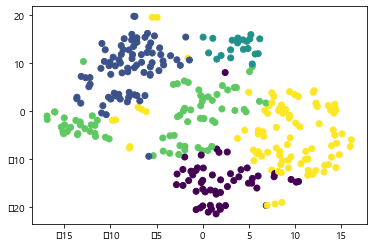

In [18]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
transformed = model.fit_transform(total_sd.iloc[:,:8])

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=kmeans.labels_)

plt.show()

#군집별로 잘 구분이 된 것을 알 수 있다.

In [19]:
total_sd.reset_index(inplace=True)

total_sd.rename(columns={'index':'학교명',0:'학급수',1:'학생수',2:'학급당평균학생수',3:'전출학생수',4:'경제환경',5:'교육환경',6:'저소득',7:'학업중단율'},inplace=True)

In [20]:
total_sd

,학교명,학급수,학생수,학급당평균학생수,전출학생수,경제환경,교육환경,저소득,학업중단율,cluster
0,국립국악고등학교,-1.940161,-1.165275,1.106262,-0.986639,0.147603,1.123600,-0.236796,-0.861804,3
1,개포고등학교,0.050598,-0.378385,-0.735055,-0.479179,0.147603,1.123600,-0.236796,-0.080091,0
2,경기고등학교,2.041358,1.857009,0.535784,0.874046,0.147603,1.123600,-0.236796,-0.135927,4
3,경기여자고등학교,1.775923,1.571223,0.434269,0.112857,0.147603,1.123600,-0.236796,0.143256,4
4,서울로봇고등학교,-0.745705,-1.094807,-1.254597,-0.986639,0.147603,1.123600,-0.236796,-1.029314,0
...,...,...,...,...,...,...,...,...,...,...
315,동국대학교사범대학부속고등학교,0.448750,0.819567,0.943731,0.282010,-1.161117,-1.017909,1.348333,-0.526784,4
316,정화여자상업고등학교,-1.409292,-1.588082,-1.618518,-0.817486,-1.161117,-1.017909,1.348333,0.869133,3
317,해성국제컨벤션고등학교,-0.347553,-0.409704,-0.257111,0.112857,-1.161117,-1.017909,1.348333,-0.024254,3
318,해성여자고등학교,-0.347553,-0.260939,0.065480,-0.902062,-1.161117,-1.017909,1.348333,-0.470947,3


In [21]:
total_sd['cluster'].value_counts()

4    92
1    79
3    75
0    54
2    20
Name: cluster, dtype: int64

In [22]:
final = pd.merge(total_sd,school_info,on='학교명',how='inner')
# final.head()

In [23]:
final

,학교명,학급수,학생수,학급당평균학생수,전출학생수,경제환경,교육환경,저소득,학업중단율,cluster,자치구
0,국립국악고등학교,-1.940161,-1.165275,1.106262,-0.986639,0.147603,1.123600,-0.236796,-0.861804,3,강남구
1,개포고등학교,0.050598,-0.378385,-0.735055,-0.479179,0.147603,1.123600,-0.236796,-0.080091,0,강남구
2,경기고등학교,2.041358,1.857009,0.535784,0.874046,0.147603,1.123600,-0.236796,-0.135927,4,강남구
3,경기여자고등학교,1.775923,1.571223,0.434269,0.112857,0.147603,1.123600,-0.236796,0.143256,4,강남구
4,서울로봇고등학교,-0.745705,-1.094807,-1.254597,-0.986639,0.147603,1.123600,-0.236796,-1.029314,0,강남구
...,...,...,...,...,...,...,...,...,...,...,...
315,동국대학교사범대학부속고등학교,0.448750,0.819567,0.943731,0.282010,-1.161117,-1.017909,1.348333,-0.526784,4,동대문구
316,정화여자상업고등학교,-1.409292,-1.588082,-1.618518,-0.817486,-1.161117,-1.017909,1.348333,0.869133,3,동대문구
317,해성국제컨벤션고등학교,-0.347553,-0.409704,-0.257111,0.112857,-1.161117,-1.017909,1.348333,-0.024254,3,동대문구
318,해성여자고등학교,-0.347553,-0.260939,0.065480,-0.902062,-1.161117,-1.017909,1.348333,-0.470947,3,동대문구


In [24]:
final.groupby('cluster').mean()

,학급수,학생수,학급당평균학생수,전출학생수,경제환경,교육환경,저소득,학업중단율
cluster,,,,,,,,
0,0.215266,-0.066137,-0.348624,-0.297496,0.706122,1.446331,-0.190668,0.007800
1,-0.413072,-0.441717,-0.198028,-0.276838,-0.966842,-0.412192,-0.572705,-0.327468
2,-1.210216,-1.459478,-1.517764,-0.170475,-0.361013,-0.164998,-0.409462,3.032804
3,-0.621836,-0.581854,-0.214852,-0.394603,0.606051,-0.658530,0.590867,-0.130716
4,0.998373,1.209735,0.879773,0.771083,0.000178,0.077728,0.211021,-0.276126


In [28]:
final[final['cluster']==2].groupby('자치구').sum()

,학급수,학생수,학급당평균학생수,전출학생수,경제환경,교육환경,저소득,학업중단율,cluster
자치구,,,,,,,,,
강남구,-1.940161,-1.971739,-2.041550,0.197433,0.147603,1.123600,-0.236796,2.432560,2
강서구,-2.900703,-3.566293,-3.848171,1.522643,-4.018735,-1.059909,-0.837765,8.526086,6
관악구,-3.349453,-3.227056,-2.478951,-1.804124,-1.370437,-0.854296,-0.020699,8.550341,4
구로구,-3.880322,-3.258375,-1.286743,-2.057854,2.198797,0.474917,0.092525,8.550341,4
도봉구,-0.960541,-2.318805,-3.751701,0.986903,0.176231,-2.035819,-2.285168,3.245856,4
동대문구,-0.082119,-1.321870,-2.470462,0.197433,-1.161117,-1.017909,1.348333,3.325947,2
서초구,-1.409292,-1.498039,-1.341053,-0.310026,-0.685219,1.418981,-1.439796,3.549293,2
성동구,-0.878423,-1.439316,-1.940565,0.535740,-1.577527,-0.427148,-0.350020,6.229454,2
성북구,-1.542009,-1.631145,-1.534742,-1.409522,-0.744706,-0.648684,-1.453949,3.325947,2


In [30]:
final.to_csv('data/Vulnerability_Cluster_5.csv',index=False)

In [29]:
final[final['cluster']==2]

,학교명,학급수,학생수,학급당평균학생수,전출학생수,경제환경,교육환경,저소득,학업중단율,cluster,자치구
7,단국대학교부속소프트웨어고등학교,-1.940161,-1.971739,-2.041550,0.197433,0.147603,1.123600,-0.236796,2.432560,2,강남구
34,고명외식고등학교,-1.542009,-1.631145,-1.534742,-1.409522,-0.744706,-0.648684,-1.453949,3.325947,2,성북구
82,서울항공비즈니스고등학교,-0.214836,-0.562384,-0.768891,1.381506,-1.339578,-0.353303,-0.279255,3.270110,2,강서구
83,서울신정고등학교,-0.480271,-0.969531,-1.310430,0.028280,-1.339578,-0.353303,-0.279255,1.595010,2,강서구
86,한광고등학교,-2.205596,-2.034377,-1.768849,0.112857,-1.339578,-0.353303,-0.279255,3.660967,2,강서구
129,경기상업고등학교,-1.276575,-1.646805,-1.991888,0.282010,-0.982655,-0.131767,-1.949302,3.046763,2,종로구
141,서일문화예술고등학교,-1.940161,-1.850378,-1.567850,-0.902062,-0.982655,-0.131767,-1.949302,0.924969,2,종로구
150,덕일전자공업고등학교,-2.338313,-1.807315,-0.337759,-1.240369,1.099398,0.237458,0.046262,6.508637,2,구로구
153,예림디자인고등학교,-1.542009,-1.451061,-0.948984,-0.817486,1.099398,0.237458,0.046262,2.041703,2,구로구
164,성수공업고등학교,-0.878423,-1.439316,-1.940565,0.535740,-1.577527,-0.427148,-0.350020,6.229454,2,성동구


In [31]:
final['학교명'].nunique()

320